<a href="https://colab.research.google.com/github/tungduongbk/tungduong/blob/master/Uber_usage_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROBLEM 5

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('uber_usage.csv')

In [3]:
df.drop(['CustomerID'], axis = 1, inplace=True)

In [4]:
df['Gender'] = df.Gender.astype('category')

In [5]:
df['Gender_encoded'] = df.Gender.cat.codes
df = df[['Gender', 'Age', 'AnnualSalary', 'Gender_encoded', 'RegularRider']]
df.head()

,Gender,Age,AnnualSalary,Gender_encoded,RegularRider
0,Male,19,19000,1,0
1,Male,35,20000,1,0
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,1,0


In [6]:
data = df.values

In [7]:
X = data[:, 1:3]
Y = data[:, 4]

### a ) Split the dataset to training set and test set using the ratio training set : test set = 7 : 3. The utility model selection.train test split can be used to split the dataset

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
Y_train, Y_test = Y_train.astype('int'), Y_test.astype('int')

### b) Use scikit-learn’s StandardScaler, fit and transform each feature (age, annual salary) into a standard normal distribution. Then use the same parameters of the distributions to transform the test set.

In [10]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)

In [12]:
X_test_scale = scaler.transform(X_test)

### c) Use scikit-learn’s SVM model to train a model on the training set and apply it to the test set.

In [13]:
from sklearn.svm import SVC

In [14]:
model = SVC(kernel='linear', probability=True, C = 1e5)
model.fit(X_train_scale, Y_train)

SVC(C=100000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
Y_predict = model.predict(X_test_scale)
predict_proba = model.predict_proba(X_test_scale)[:,1]

### d) Calculate the TP rate, FP rate, FN rate, Precision, Recall, F1 score, and AUC on the training set and test set. Compare the AUC on the training set and test set.

In [16]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_fscore_support

#### Calculate TPR, FPR, Precision, Recall, F1 score, AUC for test set using sklearn metrics

In [17]:
fpr, tpr, thresholds = roc_curve(Y_test, predict_proba) 

In [18]:
auc_test = auc(fpr, tpr)
print('AUC on test set = %s'%auc_test)

AUC on test set = 0.9481321395492436


In [19]:
conf_matrix = confusion_matrix(Y_test, Y_predict)
conf_matrix

array([[75,  4],
       [12, 29]])

In [20]:
def calculateTPRate(conf_matrix):
    TPR = conf_matrix[0][0]/(conf_matrix[0][1]+conf_matrix[0][0])
    FPR = conf_matrix[1][0]/(conf_matrix[1][0]+conf_matrix[1][1])
    FNR = conf_matrix[0][1]/(conf_matrix[0][1]+conf_matrix[0][0])
    return TPR, FPR, FNR
    
TPR, FPR, FNR = calculateTPRate(conf_matrix)

print('TPR on test set = {0}\nFPR on test set = {1}\nFNR on test set = {2}'
      .format(TPR, FPR, FNR))

TPR on test set = 0.9493670886075949
FPR on test set = 0.2926829268292683
FNR on test set = 0.05063291139240506


In [21]:
## we can use classification report from sklearn to calculate precision, recall, f1 score...
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90        79
           1       0.88      0.71      0.78        41

   micro avg       0.87      0.87      0.87       120
   macro avg       0.87      0.83      0.84       120
weighted avg       0.87      0.87      0.86       120



In [22]:
(precision_test, recall_test, fscore_test, _) = precision_recall_fscore_support(Y_test, Y_predict, average='macro')

print('Precision on test set = {0}\nRecall on test set = {1}\nF1 Score on test set = {2}'
      .format(precision_test, recall_test, fscore_test))

Precision on test set = 0.87042842215256
Recall on test set = 0.8283420808891633
F1 Score on test set = 0.8436991208075546


#### Calculate TPR, FPR, Precision, Recall, F1 score, AUC for training set 

In [23]:
Y_predict_train = model.predict(X_train_scale)
Y_predict_proba_train = model.predict_proba(X_train_scale)[:,1]
fpr_train, tpr_train, thresholds_train = roc_curve(Y_train, Y_predict_proba_train)

In [24]:
auc_train = auc(fpr_train, tpr_train)
print('AUC on training set = %s'%auc_train)

AUC on training set = 0.9151244767569949


In [25]:
conf_matrix_train = confusion_matrix(Y_train, Y_predict_train)
conf_matrix_train

array([[165,  13],
       [ 35,  67]])

In [26]:
TPR, FPR, FNR = calculateTPRate(conf_matrix_train)
print('TPR on training set = {0}\nFPR on training set = {1}\nFNR on training set = {2}'
      .format(TPR, FPR, FNR))

TPR on training set = 0.9269662921348315
FPR on training set = 0.3431372549019608
FNR on training set = 0.07303370786516854


In [27]:
## use classification report from sklearn to calculate precision, recall, f1 score...
print(classification_report(Y_train, Y_predict_train))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       178
           1       0.84      0.66      0.74       102

   micro avg       0.83      0.83      0.83       280
   macro avg       0.83      0.79      0.80       280
weighted avg       0.83      0.83      0.82       280



In [28]:
### this results are same with macro avg 0.83 0.79 0.8
(precision_train, recall_train, fscore_train, _) = precision_recall_fscore_support(Y_train, Y_predict_train, average='macro')

print('Precision on training set = {0}\nRecall on training set = {1}\nF1 Score on training set = {2}'
      .format(precision_train, recall_train, fscore_train))

Precision on training set = 0.83125
Recall on training set = 0.7919145186164354
F1 Score on training set = 0.8046398046398047


### FROM THE RESULTS ON TRAINING SET AND TEST SET: AUC ON TEST SET > AUC ON TRAINING SET

## e) Visualize the feature values and labels of the training set using a scatter plot. Visualize the feature values and decisions on another scatter plot.

### Visualize training set with scatter plot

In [29]:
w = model.coef_[0]
b = model.intercept_[0]

In [30]:
Y_train = pd.DataFrame(Y_train)
Y_train.columns = ['RegularRider']

In [31]:
df_train = pd.DataFrame(X_train_scale)
df_train.columns = ['Age', 'AnnualSalary']
df_train = pd.concat([df_train, Y_train], axis = 1)

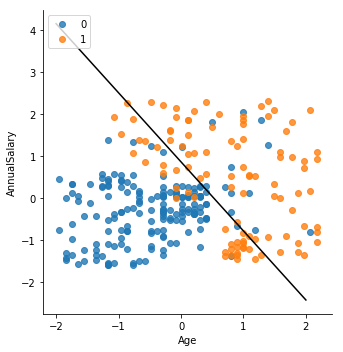

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot( x="Age", y="AnnualSalary", data= df_train, fit_reg=False, hue='RegularRider', legend=False)
plt.legend(loc='upper left')
# plot fit line training set
a = -w[0] / w[1]
xx = np.linspace(-2, 2)
yy = a * xx - b / w[1]

plt.plot(xx, yy, 'k-')
plt.show()

### Visualize the feature values and decisions on another scatter plot

In [33]:
predicted = pd.DataFrame(Y_predict_train)
predicted.columns = ['RegularRider']

In [34]:
df_predicted_train = pd.DataFrame(X_train_scale)
df_predicted_train.columns = ['Age', 'AnnualSalary']
df_predicted_train = pd.concat([df_predicted_train, predicted], axis = 1)

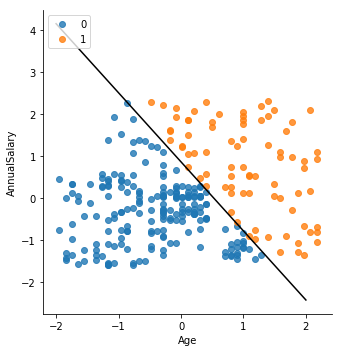

In [35]:
sns.lmplot( x="Age", y="AnnualSalary", data= df_predicted_train, fit_reg=False, hue='RegularRider', legend=False)
## plot fit line after make decisions
plt.legend(loc='upper left')
plt.plot(xx, yy, 'k-')
plt.show()